In [1]:
import pandas as pd
import numpy as np

# CSV 파일 로드
df_single = pd.read_csv('../merged_dataset/single_train/single_train.csv')
df_double = pd.read_csv('../merged_dataset/double_train/double_train.csv')

df_single.drop(['Label', 'Frame'], axis=1, inplace=True)
df_double.drop(['Label', 'Frame'], axis=1, inplace=True)

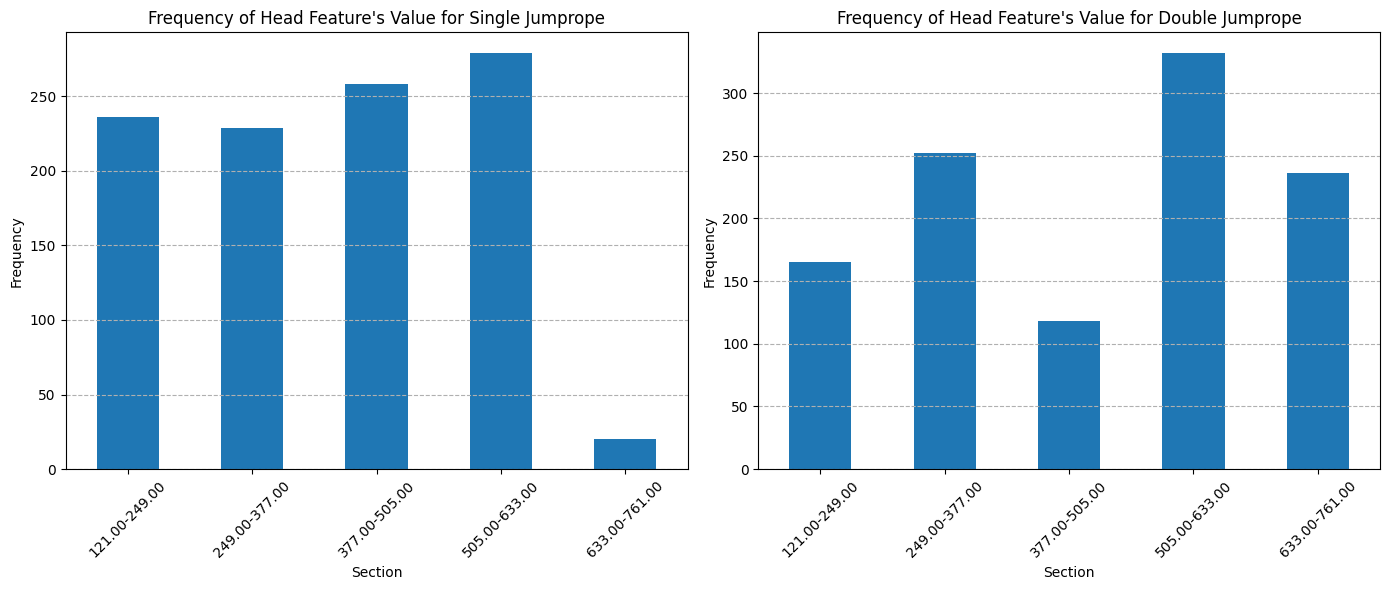

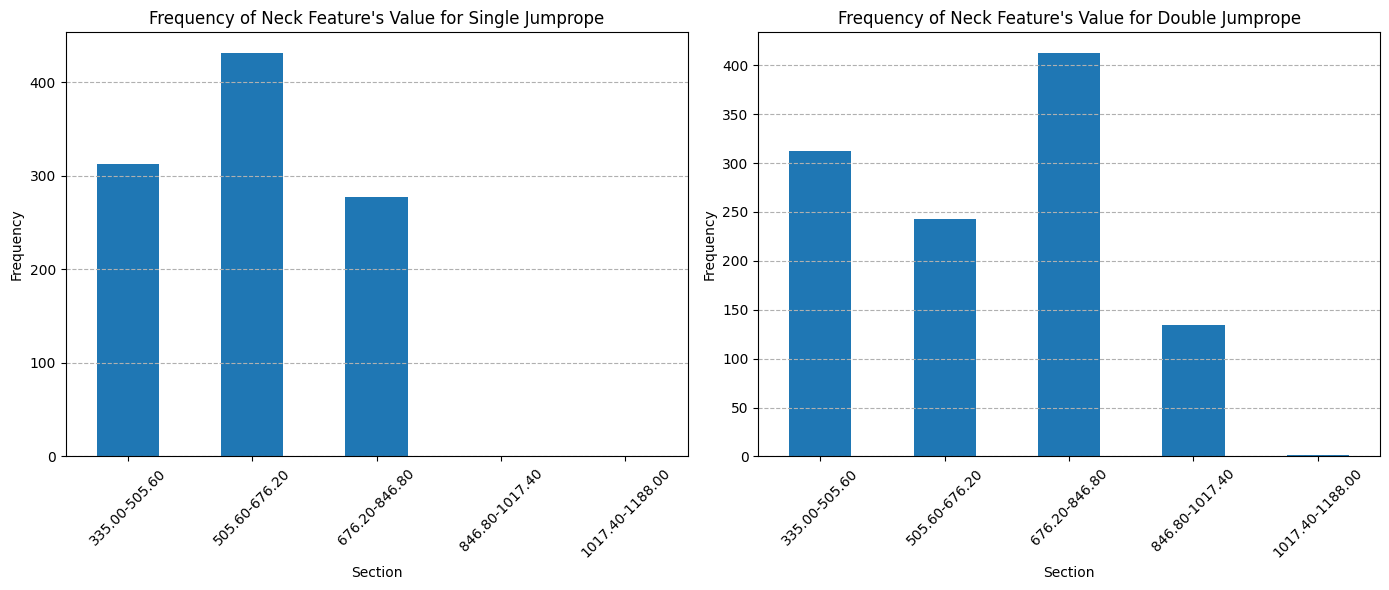

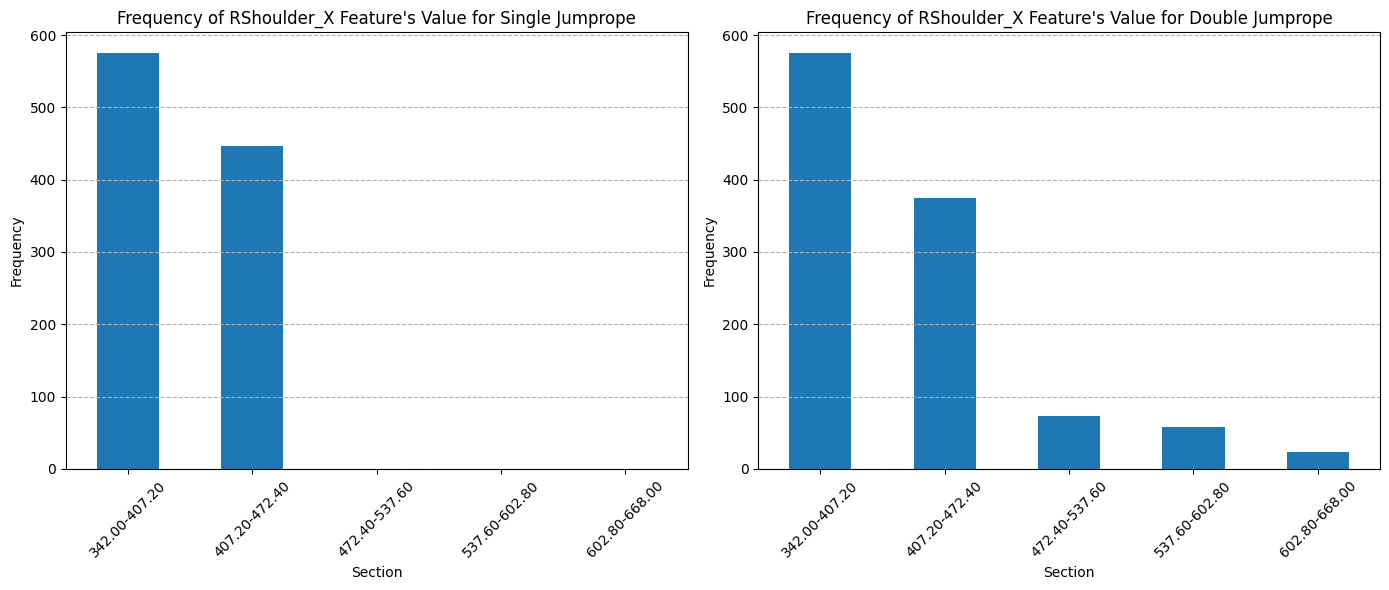

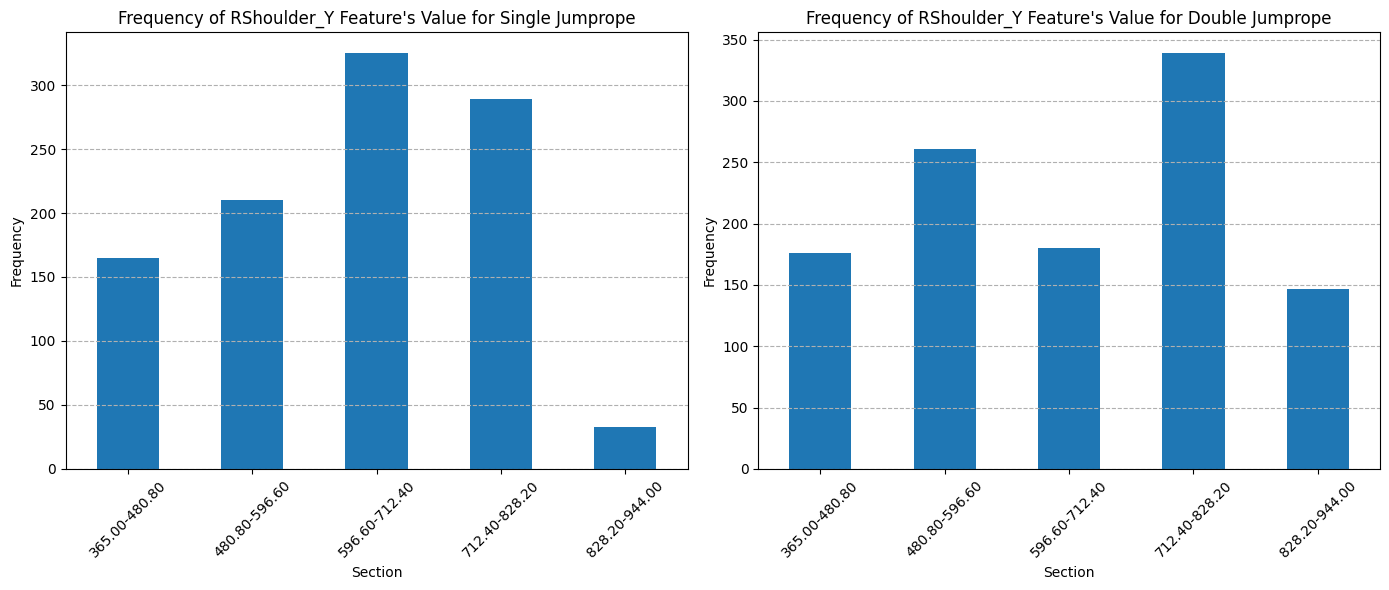

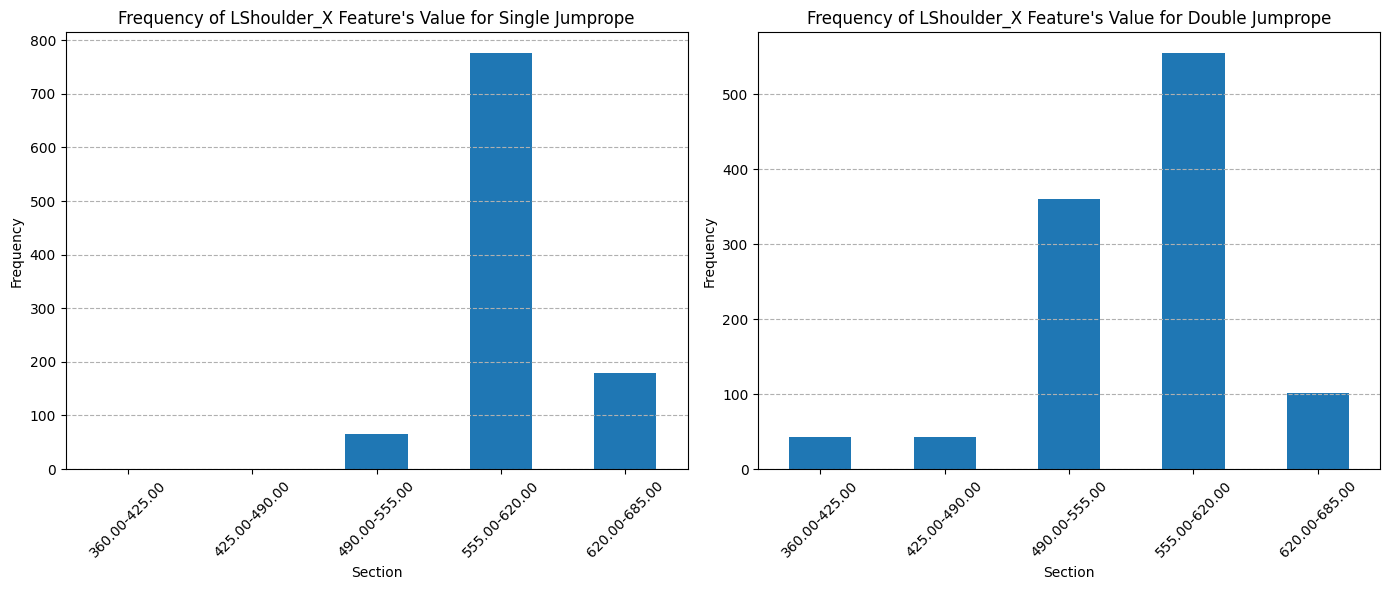

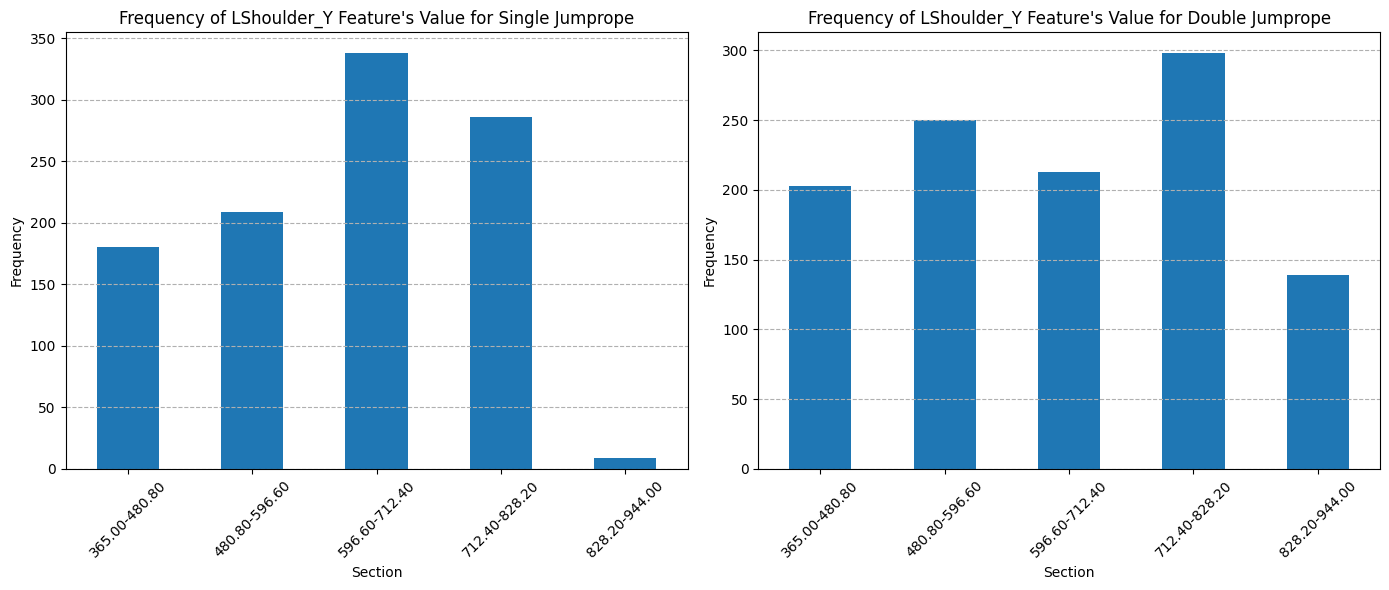

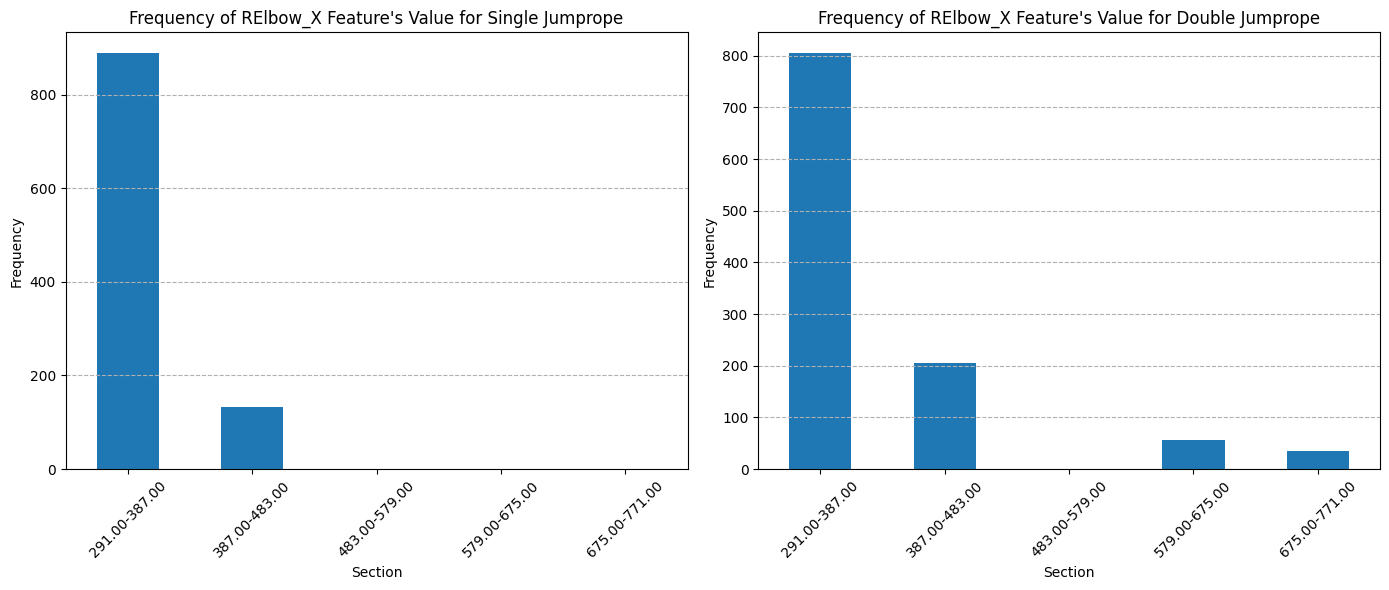

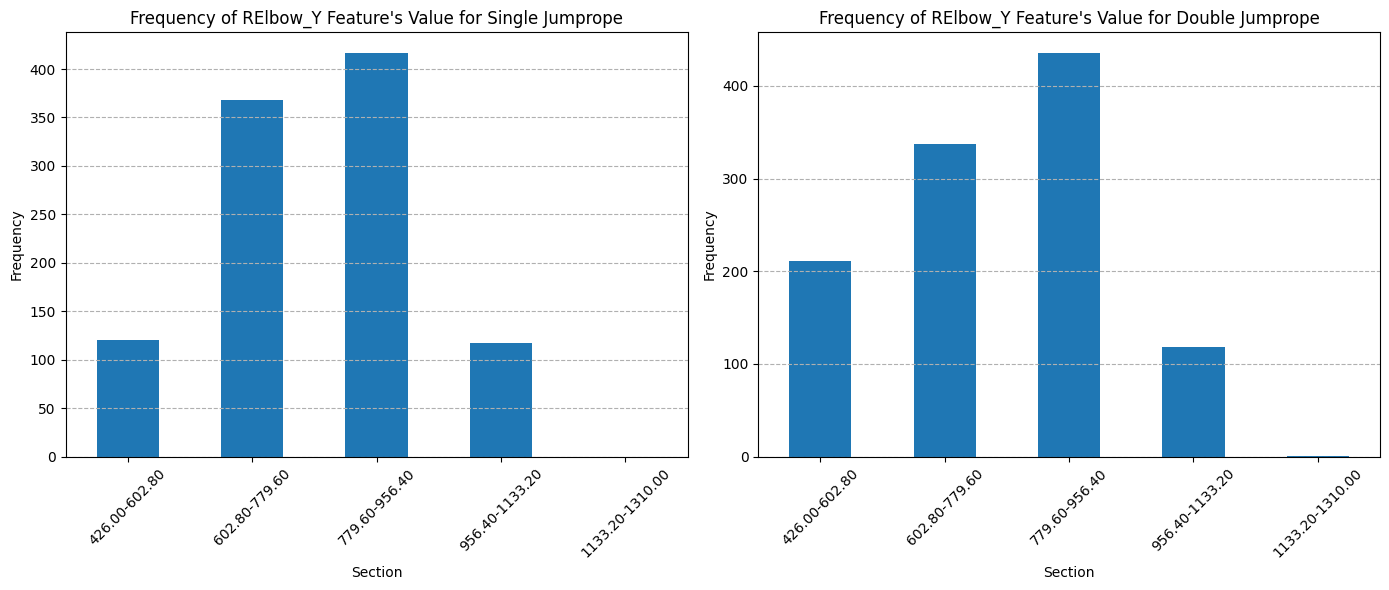

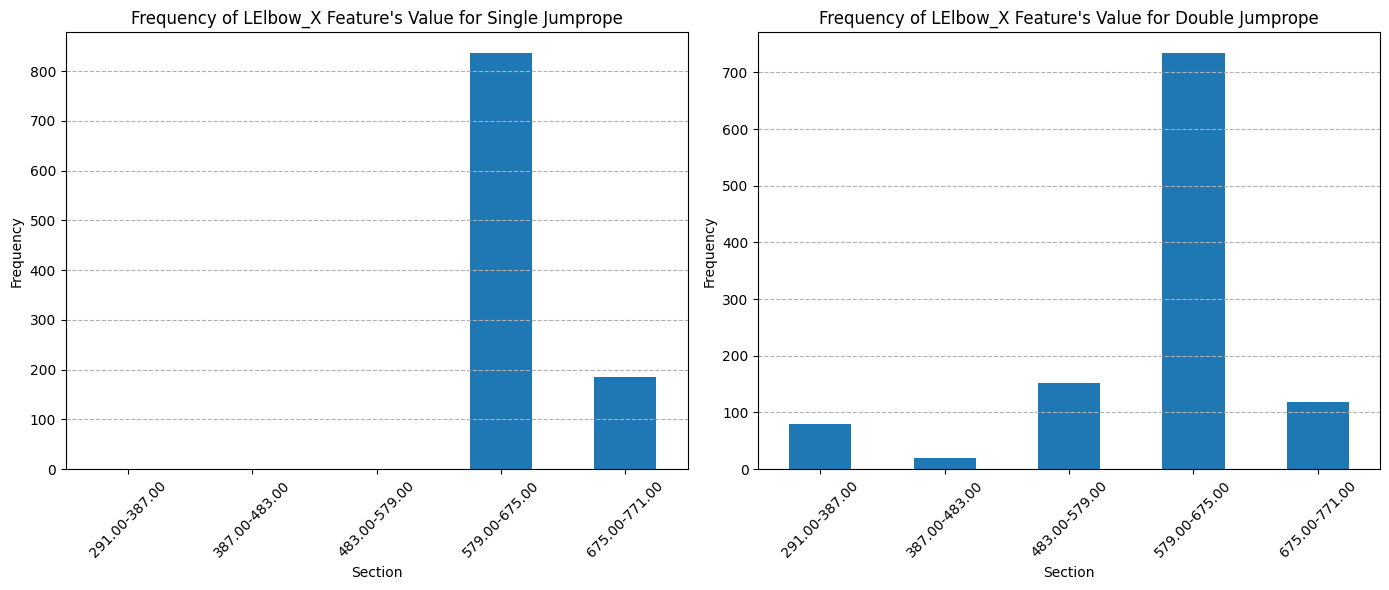

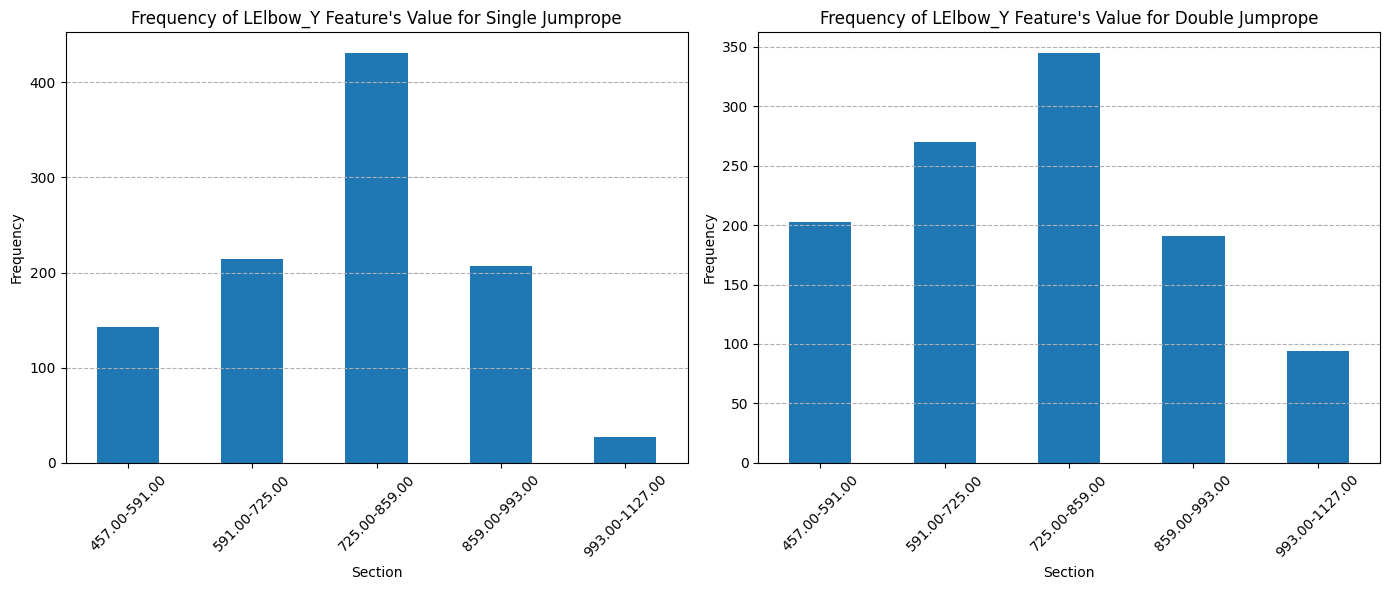

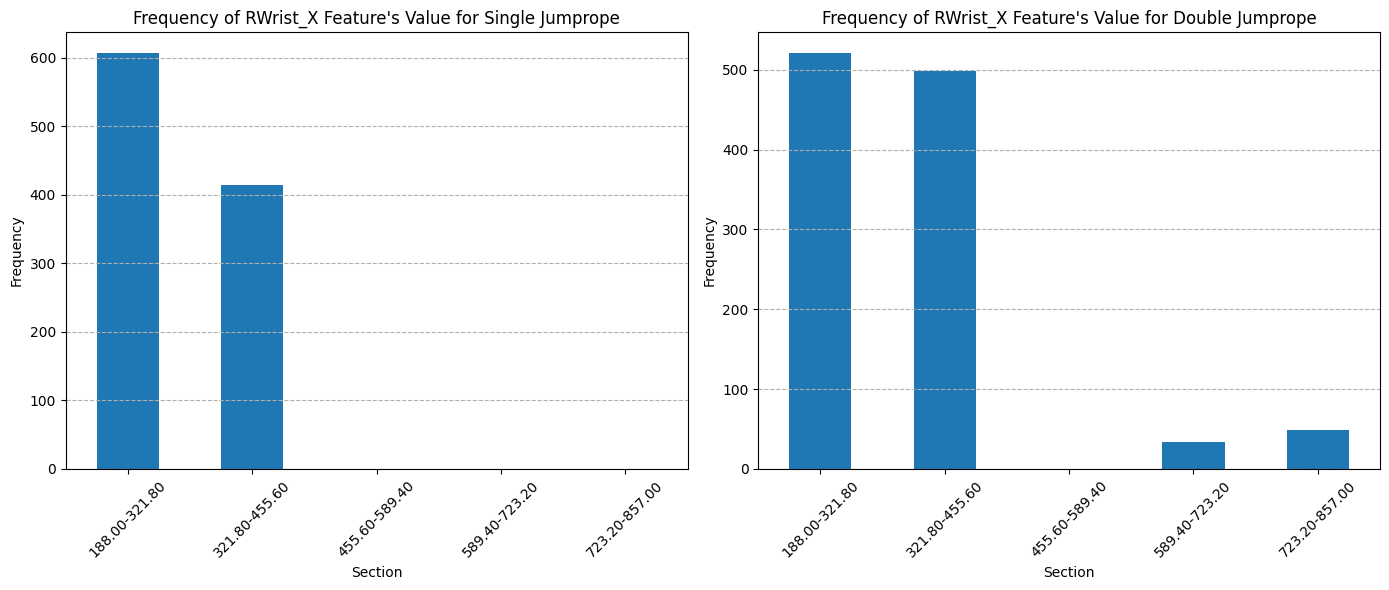

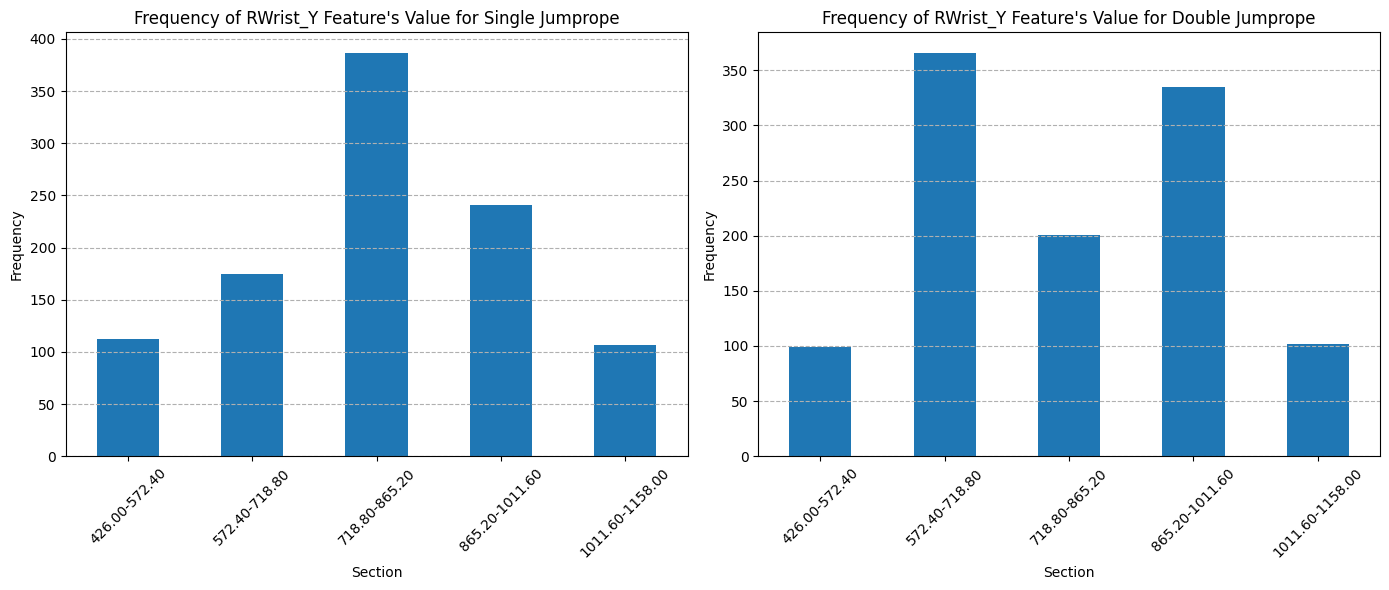

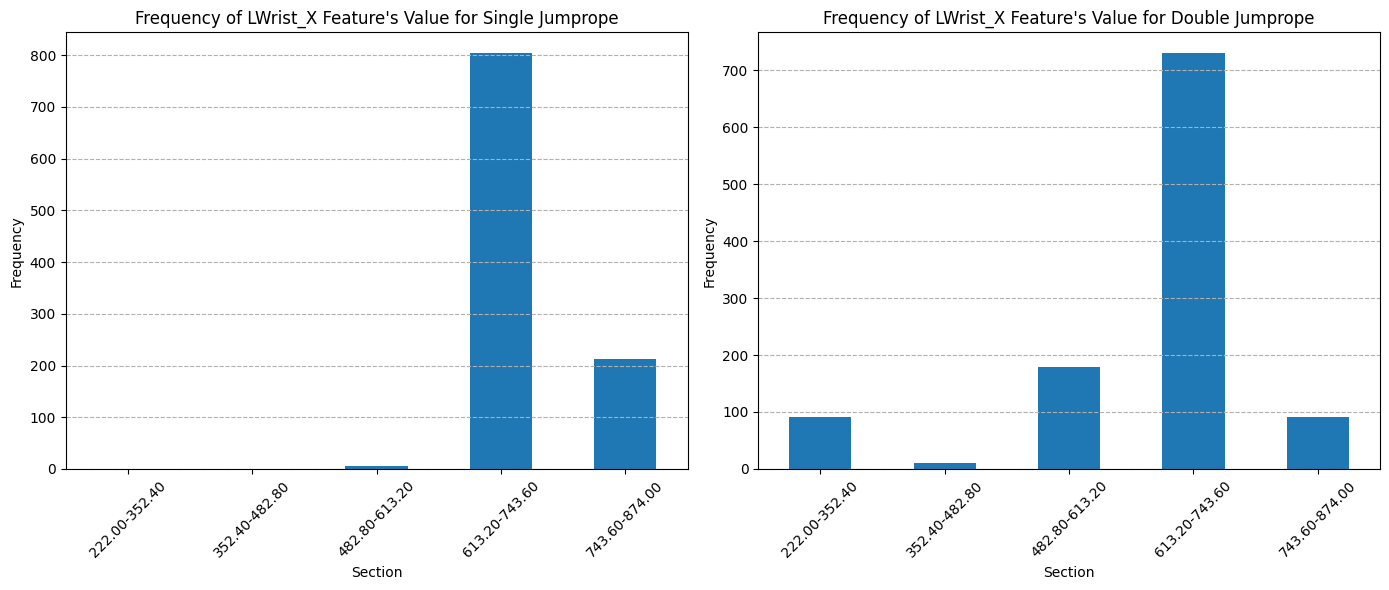

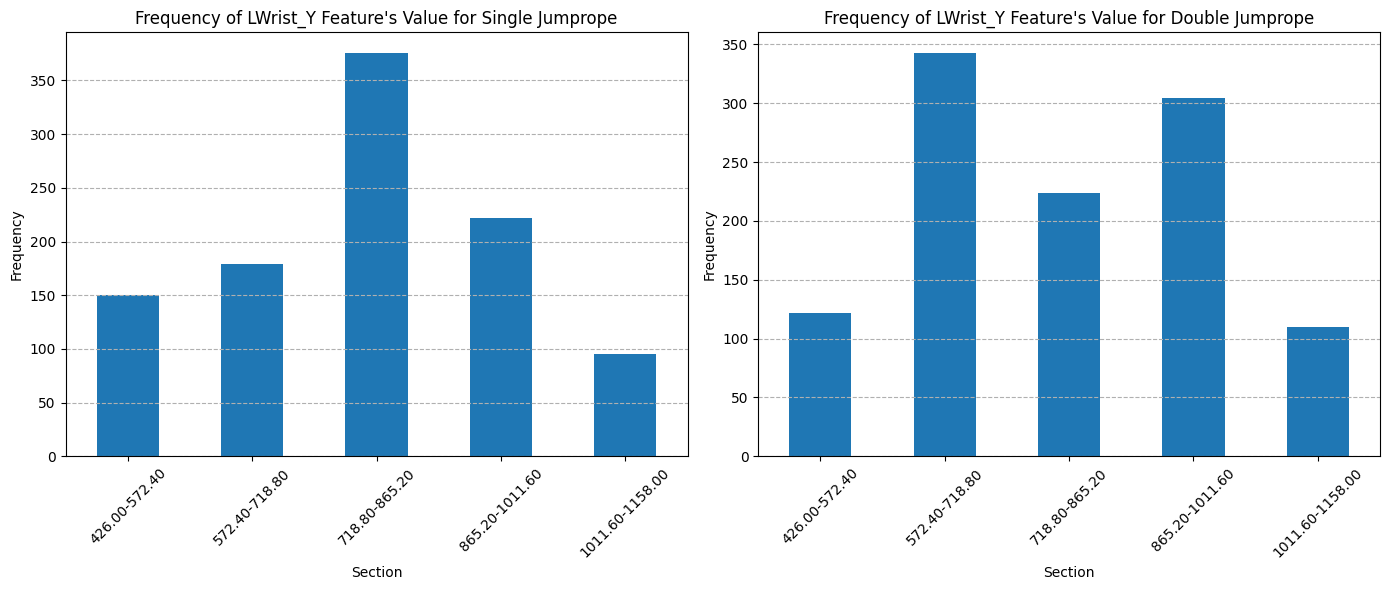

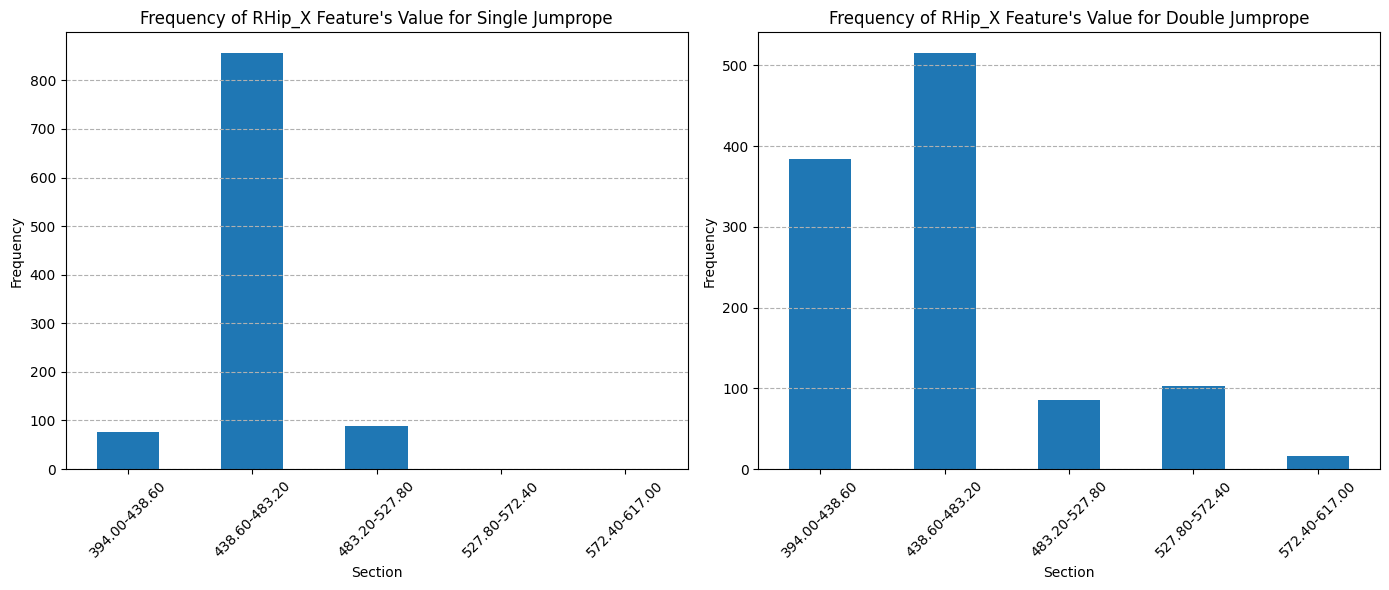

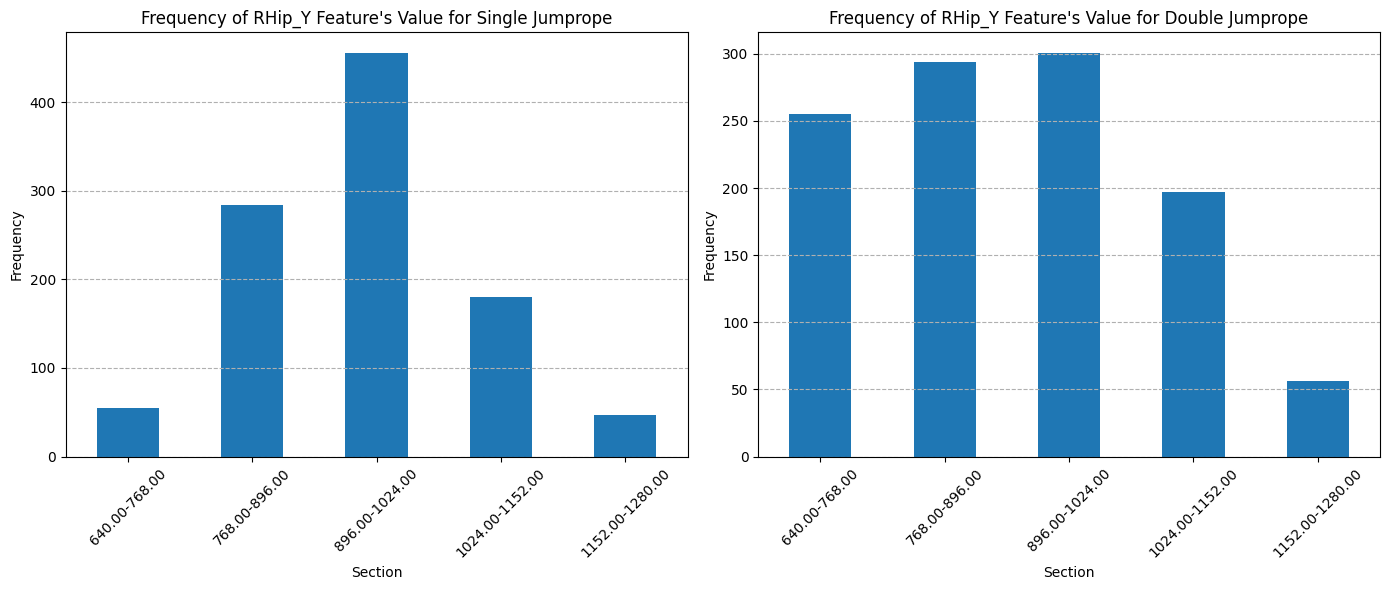

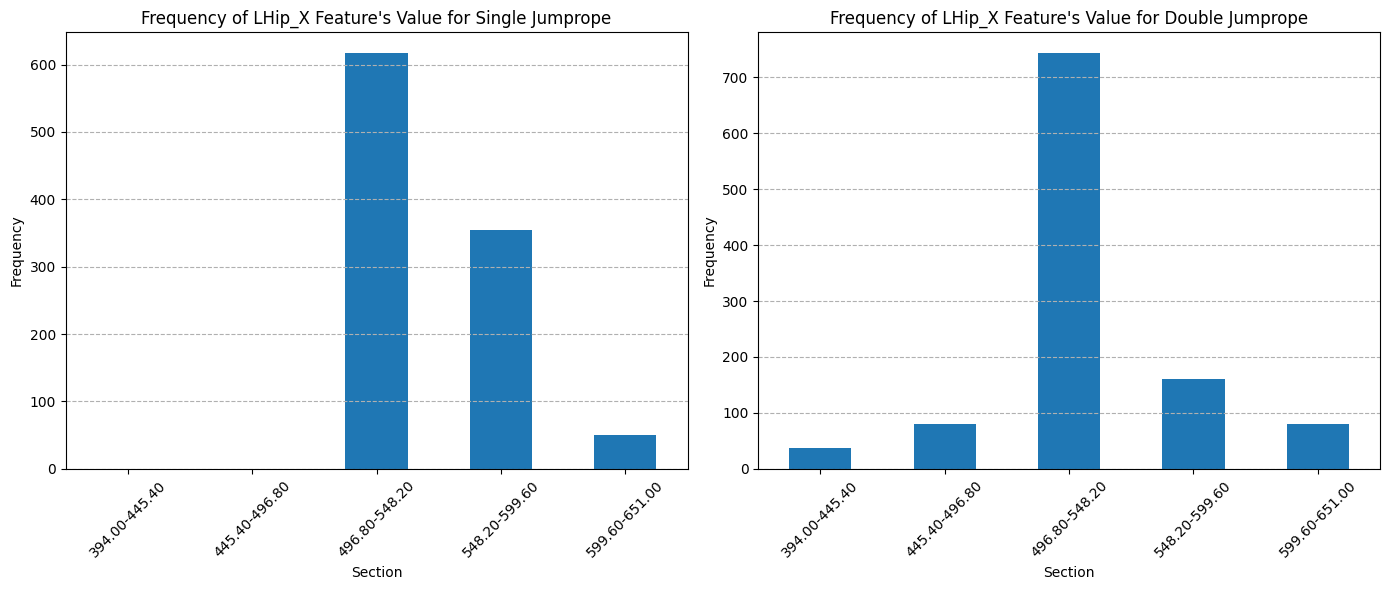

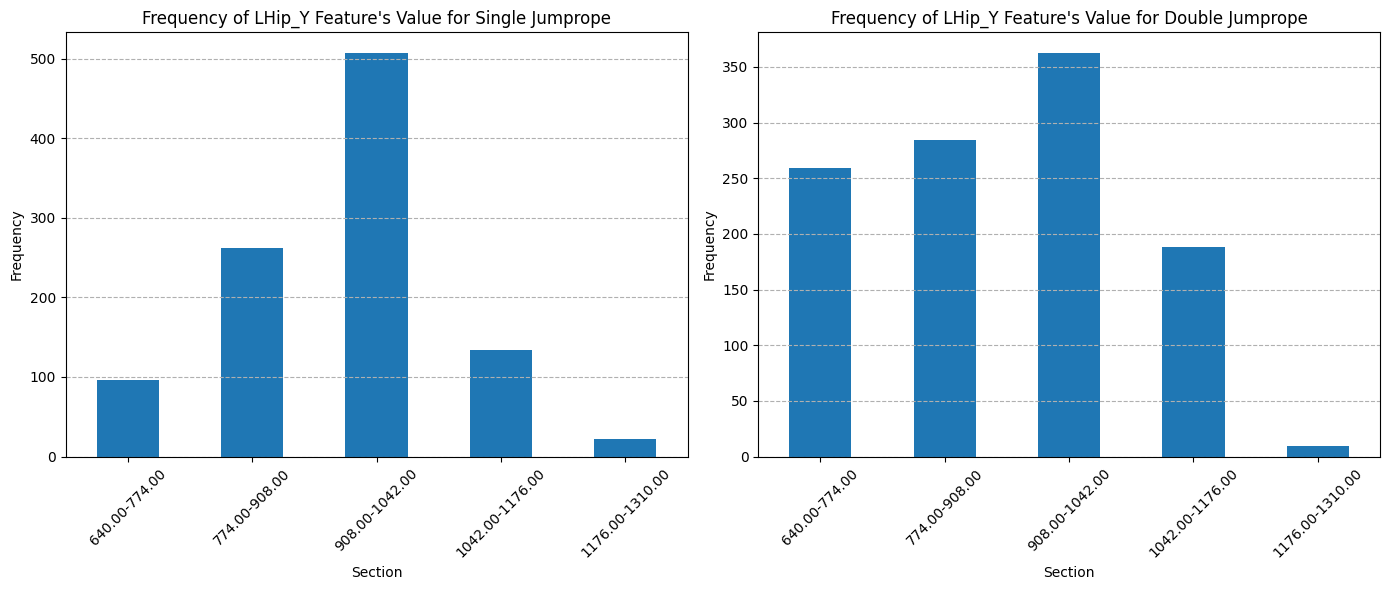

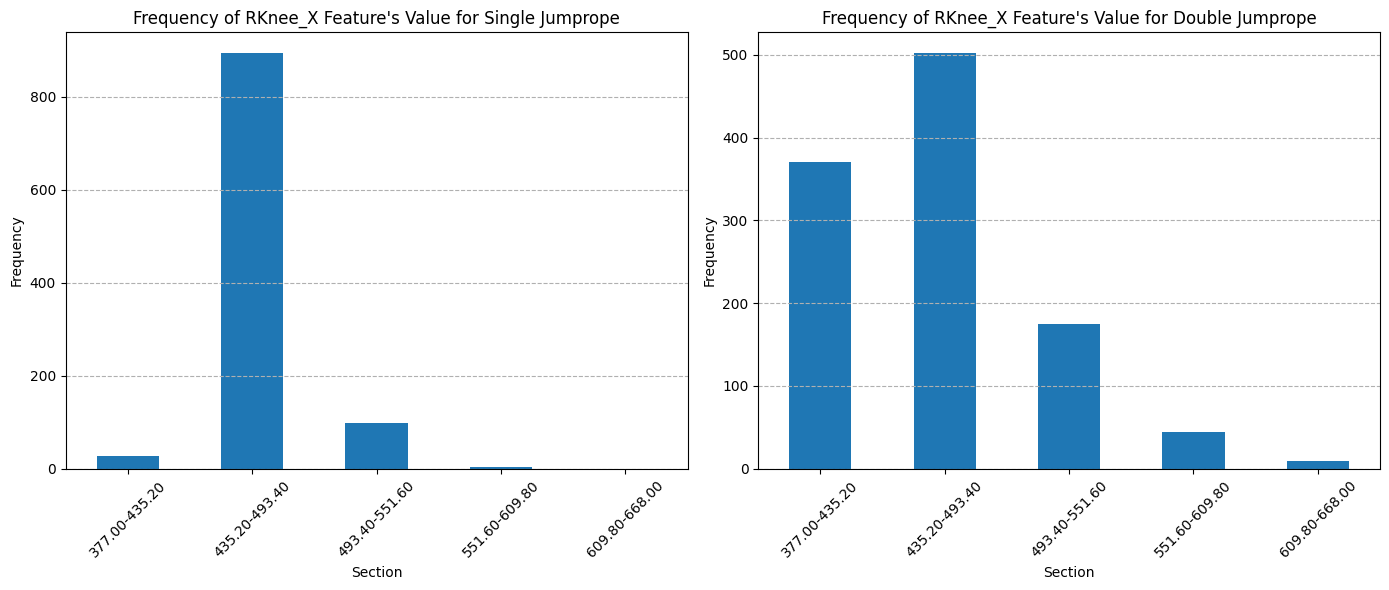

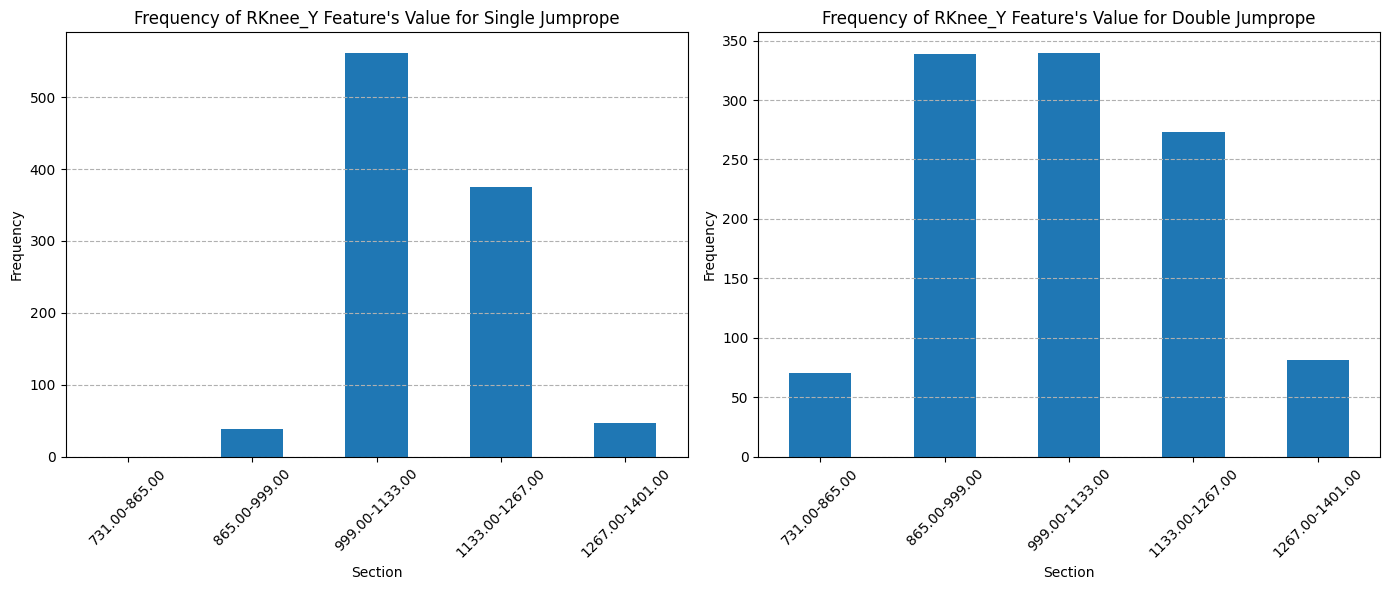

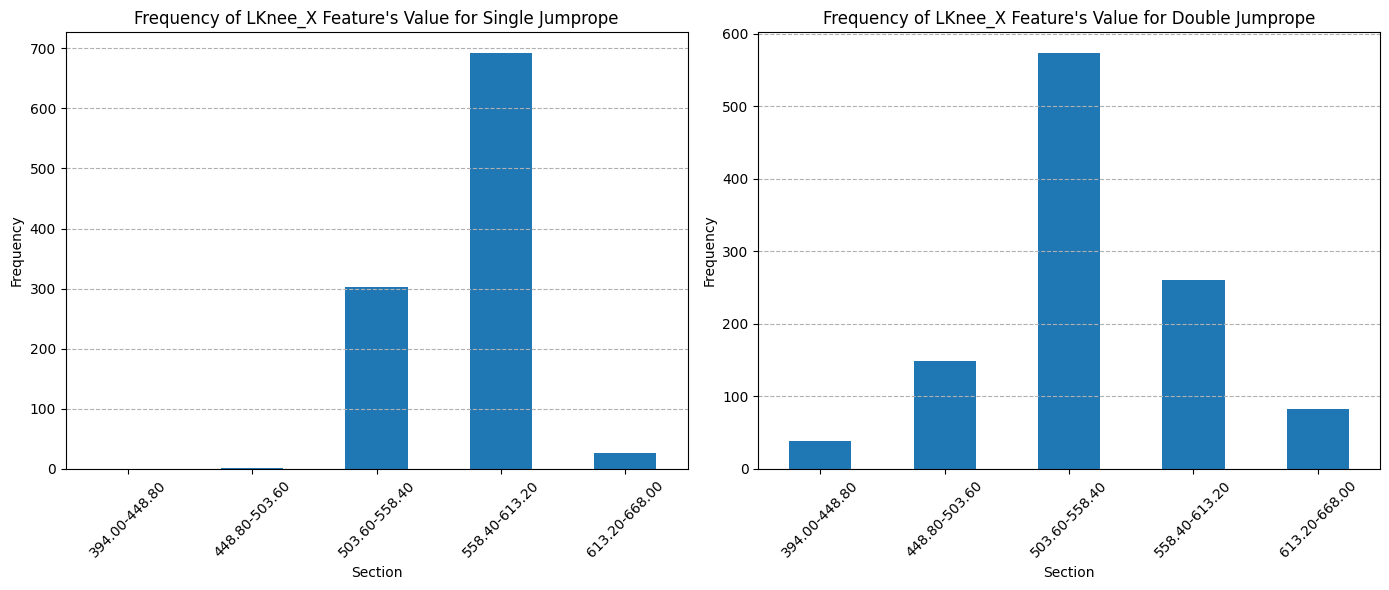

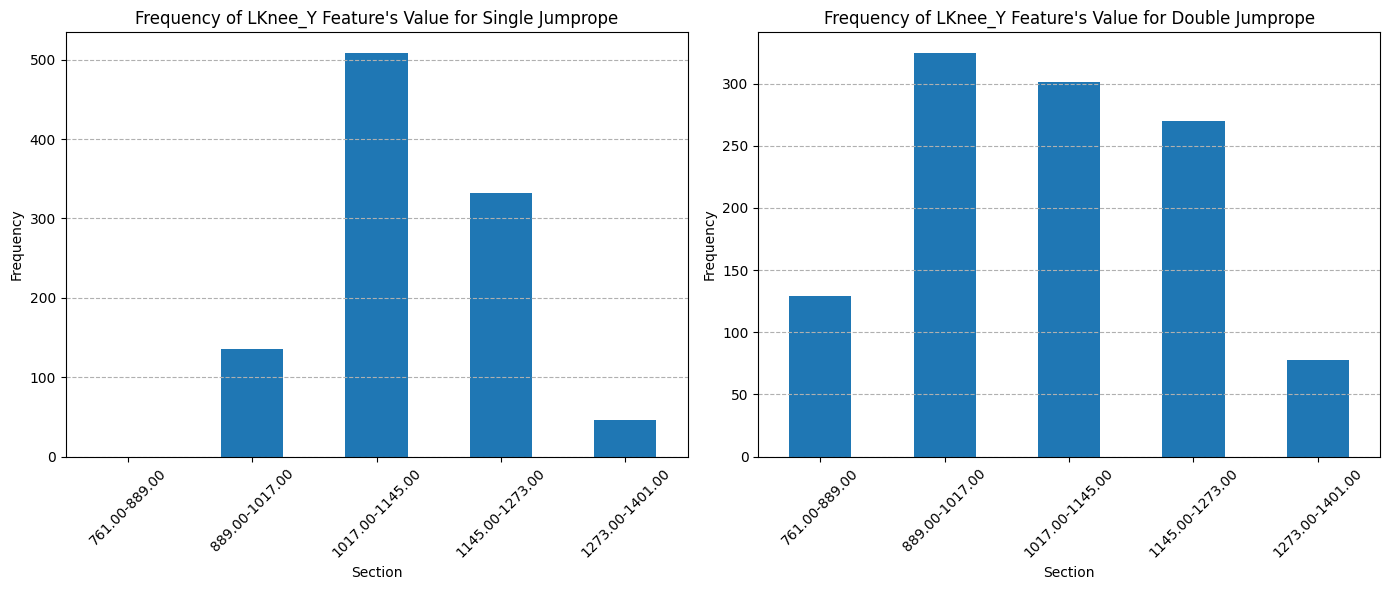

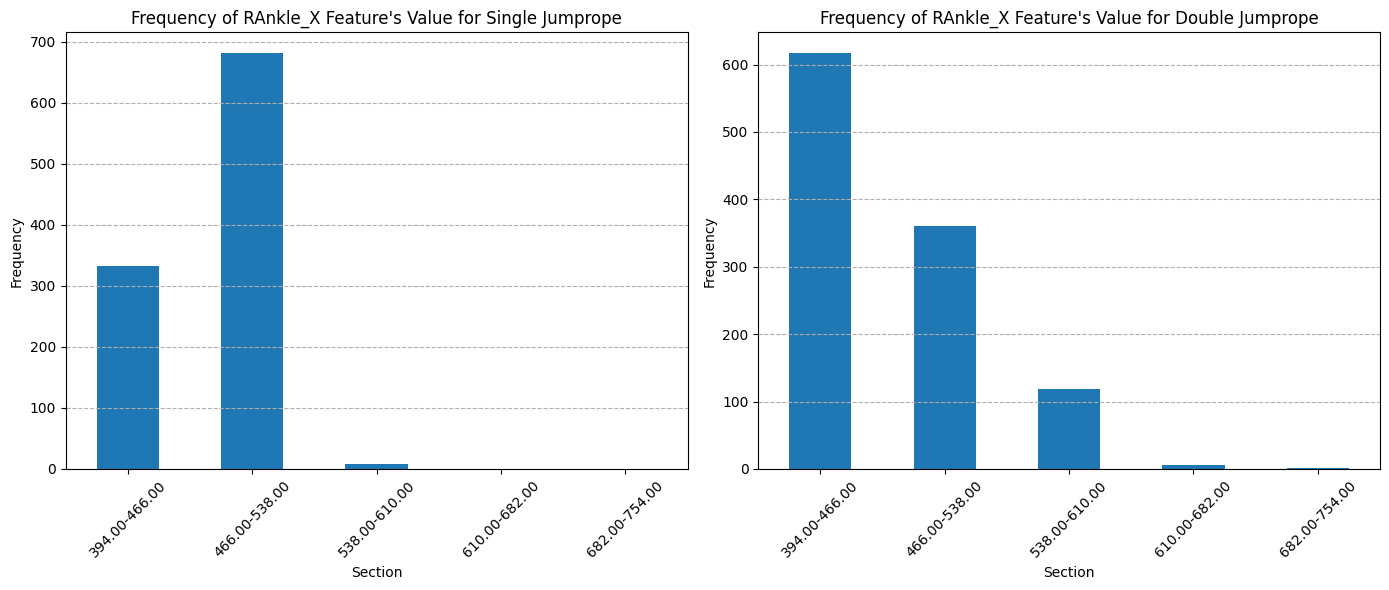

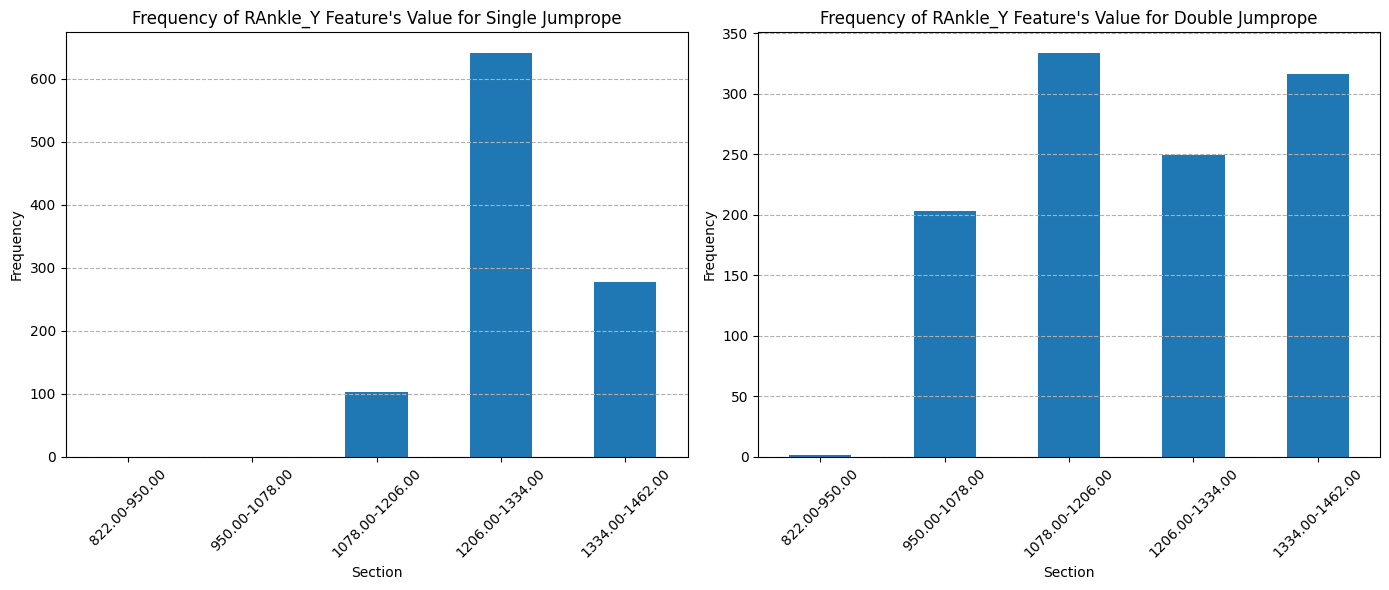

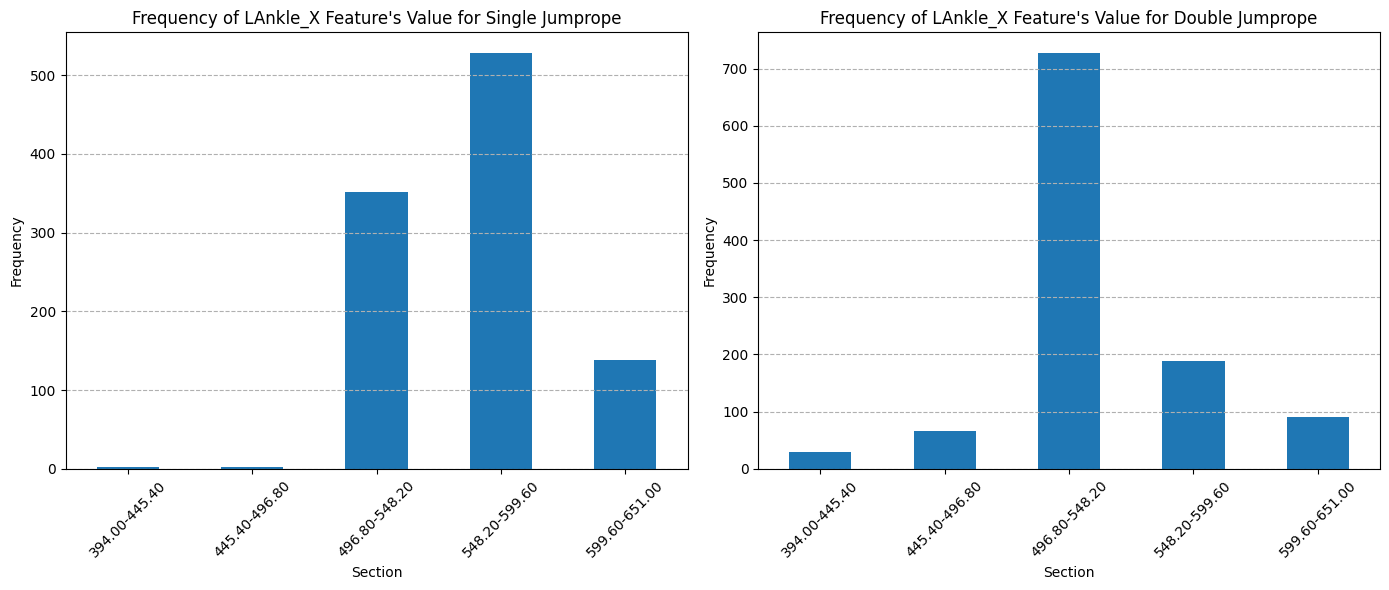

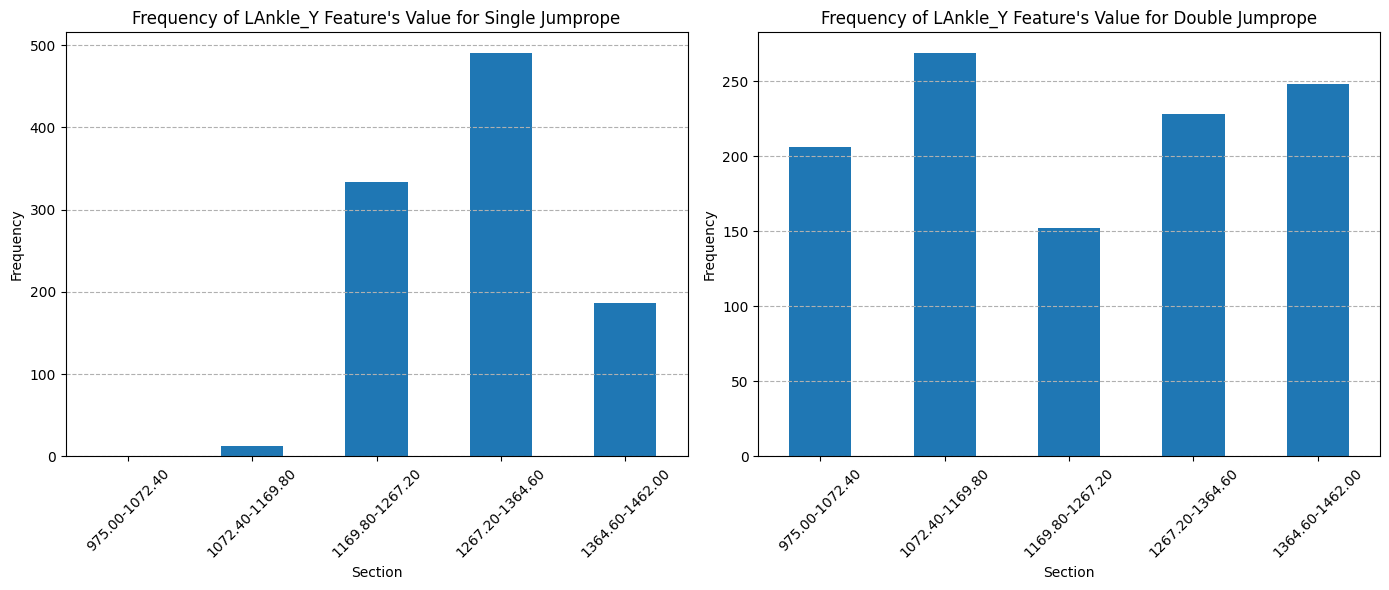

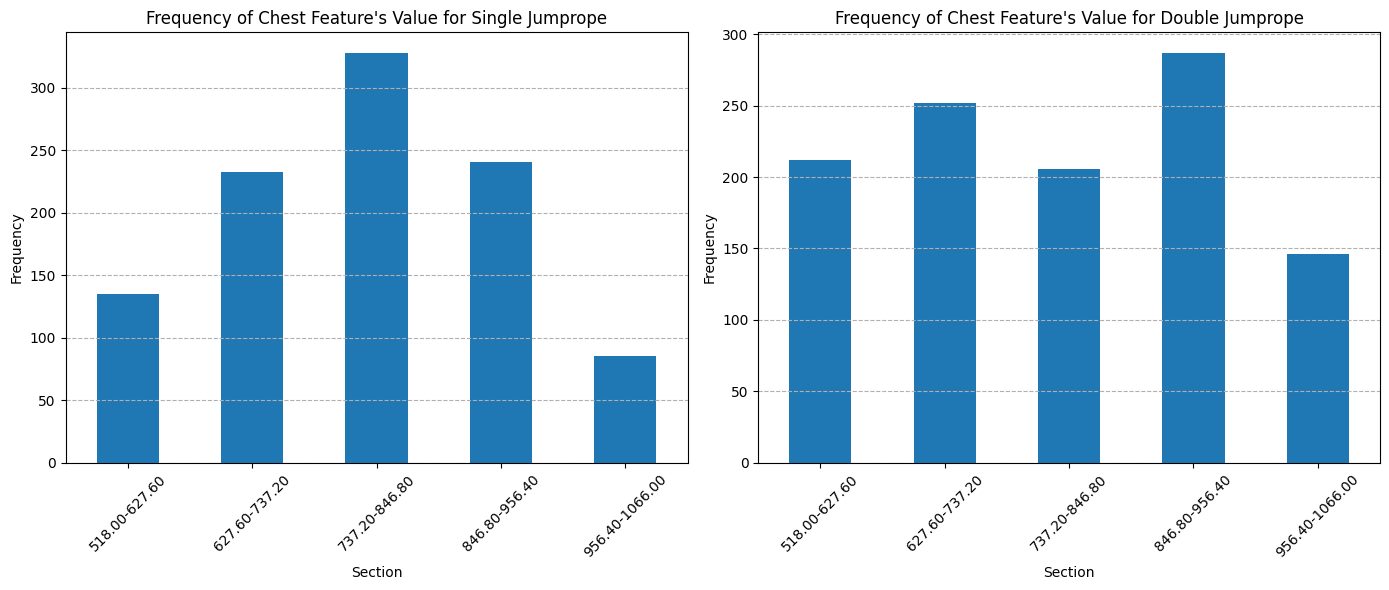

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 숫자형 특성만을 대상으로 함
numerical_cols_single = df_single.select_dtypes(include=[np.number]).columns
numerical_cols_double = df_double.select_dtypes(include=[np.number]).columns

# 각 숫자형 특성에 대해 동적으로 구간을 나누어 빈도수 계산 및 시각화
for col in numerical_cols_single:
    # 최소값과 최대값을 기반으로 구간 경계값 설정
    min_value_single, max_value_single = df_single[col].min(), df_single[col].max()
    min_value_double, max_value_double = df_double[col].min(), df_double[col].max()
    num_bins = 5  # 구간 수 설정
    min_value = min(min_value_single, min_value_double)
    max_value = max(max_value_single, max_value_double)
    bins = np.linspace(min_value, max_value, num=num_bins+1)  # 균등한 구간 생성

    # 구간 나누기 및 레이블 설정
    labels_single = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)]
    df_single[f'{col}_bin'] = pd.cut(df_single[col], bins=bins, labels=labels_single, include_lowest=True)

    labels_double = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)]
    df_double[f'{col}_bin'] = pd.cut(df_double[col], bins=bins, labels=labels_double, include_lowest=True)

    # 구간별 빈도수 계산
    frequency_single = df_single[f'{col}_bin'].value_counts(sort=False)
    frequency_double = df_double[f'{col}_bin'].value_counts(sort=False)


    # 전체 그래프 크기 조정
    plt.figure(figsize=(14, 6))  # 가로 12, 세로 6 인치로 설정

    # 첫 번째 CCA 축을 사용하여 데이터 시각화
    plt.subplot(1, 2, 1)
    frequency_single.plot(kind='bar')
    plt.title(f'Frequency of {col} Feature\'s Value for Single Jumprope')
    plt.xlabel('Section')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.grid(axis='y', linestyle='--')


    # 두 번째 CCA 축을 사용하여 데이터 시각화
    plt.subplot(1, 2, 2)
    frequency_double.plot(kind='bar')
    plt.title(f'Frequency of {col} Feature\'s Value for Double Jumprope')
    plt.xlabel('Section')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.grid(axis='y', linestyle='--')


    plt.tight_layout()
    plt.show()
